# Notebook 08: Variable type, pandas dataframes, and sequel query
by Rachel Langgin \\
March 2022 and July 2024 \\
Haverford College and University of Nevada, Las Vegas \\

In [ ]:
# Import some common modules
import numpy as np
import matplotlib.pyplot as plt
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
# import SciServer.SkyServer as SkyServer   # show individual objects and generate
    # thumbnail images through SkyServer
print('SciServer libraries imported')

# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')

import astroML
from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

ModuleNotFoundError: No module named 'SciServer'

## Data Types
We've kind of avoided talking about data types, but you've received hints of it when I've given you commands like:
```
print("Hello there %d" %7)
```
which tells python to print the number 7 as an integer (because d stands for integer, for some reason I've never understood.)

There are 3 data types I want you to learn now:
* float (short for "floating point", i.e. anything with a decimal in it)
* integer (any number without a decimal in it)
* string (any "string" of characters. Usually things like "hello" or "RA", but also can confusingly be things like "12.7".  That's also a string of characters.

Let's investigate how this works...

In [ ]:
var1 = 17.1

In [ ]:
type(var1)

float

So python automatically assumed it was a float, because there was a decimal point in it.

In [ ]:
var2 = 14

In [ ]:
type(var2)

int

So python automatically assumed it was an integer, because there was no decimal point in it.

In [ ]:
var3 = "hi!!"

In [ ]:
type(var3)

str

Python automatically assumed it was a string (of characters), because it was enclosed in quotes.  

Can you think of a situation where you would want a number to be a string?  Talk to the person next to you.

Things the class thought of:
* labeling
* listing something (may not necessarily need a string for that)
* if you want a number in a file name
* To add it into a longer string

In [ ]:
mynumber = 427.7**2

In [ ]:
str1="hello"
str2=" "
str3=str(mynumber)
str4=" people"

In [ ]:
bigstring = str1 + str2+str3+str2 +str4

In [ ]:
bigstring

'hello 182927.28999999998  people'

In [ ]:
var4 = str(var2)

Can you think of a situation where you would want a float to turn into an integer?

What the class thought of:
* you want a function to tell you how many cookies you want to make with a particular set of ingredients
* population function - anything that tells you how many people
* anything you want to round up or down

In [ ]:
# We did a little experimenting with how we could get a function that would always
# round up or always round down depending on what we wanted.
var1 = 17.00000

In [ ]:
var5 = int(var1) + 1  # This is one way to get it to round up, but it doesn't always
var5    # work, for example when var1=17.000 as it is above.  The functions I used
# to use for this are called floor() and ceil() but I don't know if python has something
# similar.  Maybe on Friday we'll talk about how to search for functions you might want
# on the internet.  It's good to know a few things about that before going searching.

18

In [ ]:
type(var5)

int

Now let's use this tool to debug some code.  I've written an intentially confusing and contorted loop. It also doesn't work, but that's the least of our problems.  Things I want to show you using my terrible loop:
* How type() can help you
* How commenting out can help you
* How printing can help you
* How commenting can help you

In [ ]:
myarray = ("Help", "me", ",", "I", "don't", "understand", "this!")
myotherarray = (57.7, 18.1, 19.2, 4.0, -1.3, 3.14159, 22/7)
for i in range(24):
    i = myotherarray[i]
    print(myarray[i]) #<- the first time through the loop i will be 57.7 and myarray[57.7] is
    # not a valid "reference" to the array

TypeError: tuple indices must be integers or slices, not float

In [ ]:
# How type can help you debug

In [ ]:
myarray = ("Help", "me", ",", "I", "don't", "understand", "this!")
myotherarray = (57.7, 18.1, 19.2, 4.0, -1.3, 3.14159, 22/7)
for i in range(24):
    i = myotherarray[i]
    print(type(i))
    print(myarray[i])

<class 'float'>


TypeError: tuple indices must be integers or slices, not float

In [ ]:
# Aha!  So "i" is not an integer by the time it get to the print(myarray[i]) line, and so it produces an error

In [ ]:
# Use commenting out to help you

In [ ]:
myarray = ("Help", "me", ",", "I", "don't", "understand", "this!")
myotherarray = (57.7, 18.1, 19.2, 4.0, -1.3, 3.14159, 22/7)
for i in range(24):
#    i = myotherarray[i]
    print(myarray[i])

Help
me
,
I
don't
understand
this!


IndexError: tuple index out of range

In [ ]:
#  Commenting out helped me isolate one of my problems

### How can printing help you?
This was fun, we had a debate about whether the following code would run without
giving any errors. It's a little surprising that it does.   We concluded that the "for"
loop dutifully goes through each element in the list (in this case [0,1,2,3,4,5,6] whether
or not i has been set to something else in the meantime.)

In [ ]:
myarray = ("Help", "me", ",", "I", "don't", "understand", "this!")
myotherarray = (57.7, 18.1, 19.2, 4.0, -1.3, 3.14159, 22/7)
for i in range(7):
     print(i)
     i = myotherarray[i]
     print(i)
#     print(myarray[i])
#     print(i)

0
57.7
1
18.1
2
19.2
3
4.0
4
-1.3
5
3.14159
6
3.142857142857143


In [ ]:
# Will this work?  Will it produce an error?  We took care of the problem that we were trying to index an array
# with a float.
myarray = ("Help", "me", ",", "I", "don't", "understand", "this!")
myotherarray = (57.7, 18.1, 19.2, 4.0, -1.3, 3.14159, 22/7)
for i in range(7):
    i = myotherarray[i]
    print(int(i))
    print(myarray[int(i)])

57


IndexError: tuple index out of range

But as you see, now we produced another one because we asked for the 57th element
of the array and it only has 7 elements.

## SQL Queries
You've started to do enough SQL queries that you're getting curious.

Let's look at the structure of this query you've got in your lab:

In [ ]:
query="""
SELECT ra
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a
# dataframe that we've named right_ascension.
ra = CasJobs.executeQuery(query, "dr14")
ra = (np.array(ra))[:,0]   #Recast "ra" as a numpy array for better handling

print("SQL query finished.")
print("SQL query returned " + str(len(ra))+ " galaxies")

SQL query finished.
SQL query returned 100724 galaxies


Now that we know types we can investigate what query is:

In [ ]:
type(query)

str

In [ ]:
query

"\nSELECT ra\nFROM SpecPhotoAll\nWHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17\n"

Conclusion: "query" is just a string.  The function "CasJobs.ExecuteQuery()" expect a string as one of its arguments.  Another way of saying that is "We passed the string 'query' to the function CasJobs.ExecuteQuery()." I want you to practice that lingo. It's important to be able to talk about what your programs are doing.



Let's actually just play with that syntax of defining a string.

In [ ]:
mystring="""I want to write a poem
roses are red
violets are blue
presidents' day is today
and we're still in school"""

In [ ]:
mystring[10:20]

'write a po'

What is a CasJobs?  It's another module just like numpy and matplotlib.pyplot.

See
https://skyserver.sdss.org/casjobs/
for more info. It's a
a collection of functions that you can use by importing it.
If you look up at the top of the workbook here, you'll see that SciServer is actually
a collection of modules - CasJobs, Skyserver, etc.  Each of those is itself a collection of
functions that you can use.

Finall "dr14" is the database that the query is looking in. dr14 stands for "Data Release 14."

## Dataframes
It turns out that the query returns a dataframe. How do I know that?  Let's use type to see.

In [ ]:
query="""
SELECT ra, dec, z
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a
# dataframe that we've named galaxies
galaxies = CasJobs.executeQuery(query, "dr14")


In [ ]:
galaxies

,ra,dec,z
0,170.940050,-1.274307,0.076971
1,170.896670,-1.565725,0.044631
2,170.927050,-1.601643,0.063028
3,171.409540,-1.220875,0.094862
4,171.315410,-2.076099,0.062868
5,171.197840,-1.973069,0.059219
6,171.460080,-1.200215,0.041770
7,171.478150,-1.583712,0.045895
8,171.526300,-1.833629,0.044865
9,171.381450,-2.224312,0.044790


In [ ]:
# What type of data is this?  A panda dataframe. (Panda is like a brand.)
type(galaxies)

pandas.core.frame.DataFrame

In [ ]:
# If you just want one row of the table you can type
galaxies[1000:1001]

,ra,dec,z
1000,167.71908,-1.03051,0.090376


In [ ]:
# or
galaxies.iloc[1000]

ra     167.719080
dec   -1.030510  
z      0.090376  
Name: 1000, dtype: float64

In [ ]:
# If you only want one right-ascension from one row of the table you can type
galaxies[1000:1001].ra

1000    167.71908
Name: ra, dtype: float64

In [ ]:
# Galaxies.ra is a series that holds all the RA's of each row.
type(galaxies.ra)

pandas.core.series.Series

In [ ]:
# We can make a numpy.array out of the series by doing this
ra2 = np.array(galaxies.ra)
type(ra2)

numpy.ndarray

In [ ]:
# We can see how many elements ra2 has by using np.size
np.size(ra2)

100724

# Assignment #1:
* Download one of the csv's from here https://www.kaggle.com/datasets or really anywhere on the web. (Try a google search for "csv data" and then whatever subject you want.)
* read it into a panda data table using pandas.read_csv("filename")
* plot a numerical portion of it somehow
* plot some subset of it by recasting it into np.arrays and using np.where

I got the Foreign Exchange data from a different site, actually, but same idea, and imported it into jupyter.
This command won't work unless you download the Foreign_Exchange_Rate file into your area as well.  It's in the same place you got this notebook.

In [ ]:
Exchange = pandas.read_csv("Foreign_Exchange_Rate-_U.K._Pound__USD.csv", delimiter=',', skiprows=0)

Note about "skiprows".  Sometimes csv tables have weird things at the top and you need to "skiprows".  I left that in there in case you needed it. But since it's set to zero it's not doing anything.

In [ ]:
# To look at our table we just say its name:
Exchange

,Date,1/1/1971,2/1/1971,3/1/1971,4/1/1971,5/1/1971,6/1/1971,7/1/1971,8/1/1971,9/1/1971,...,4/1/2019,5/1/2019,6/1/2019,7/1/2019,8/1/2019,9/1/2019,10/1/2019,11/1/2019,12/1/2019,1/1/2020
0,Foreign Exchange Rate- U.K Pounds/ USD,-,-,-,-,-,-,-,-,-,...,0.77,0.78,0.79,0.80,0.82,0.81,0.79,0.78,0.76,0.76
1,Foreign Exchange Rate- US Dollars per UK Pound,2.41,2.42,2.42,2.42,2.42,2.42,2.42,2.43,2.47,...,1.30,1.29,1.27,1.25,1.22,1.24,1.27,1.29,1.31,1.31


In [ ]:
# The name of the columns is in an array called...
Exchange.columns

Index(['Date', '1/1/1971', '2/1/1971', '3/1/1971', '4/1/1971', '5/1/1971',
       '6/1/1971', '7/1/1971', '8/1/1971', '9/1/1971',
       ...
       '4/1/2019', '5/1/2019', '6/1/2019', '7/1/2019', '8/1/2019', '9/1/2019',
       '10/1/2019', '11/1/2019', '12/1/2019', '1/1/2020'],
      dtype='object', length=590)

I actually to get the first row.  I looked up how to do that here:
https://www.geeksforgeeks.org/get-a-specific-row-in-a-given-pandas-dataframe/
iloc is something you'll use a lot.

In [ ]:
# This gets you the 0th row
Exchange.iloc[0]

Date         Foreign Exchange Rate- U.K Pounds/ USD
1/1/1971     -                                     
2/1/1971     -                                     
3/1/1971     -                                     
4/1/1971     -                                     
5/1/1971     -                                     
6/1/1971     -                                     
7/1/1971     -                                     
8/1/1971     -                                     
9/1/1971     -                                     
10/1/1971    -                                     
11/1/1971    -                                     
12/1/1971    -                                     
1/1/1972     -                                     
2/1/1972     -                                     
3/1/1972     -                                     
4/1/1972     -                                     
5/1/1972     -                                     
6/1/1972     -                                     
7/1/1972    

### One easy thing we can do is plot the exchange rate by itself with no dates

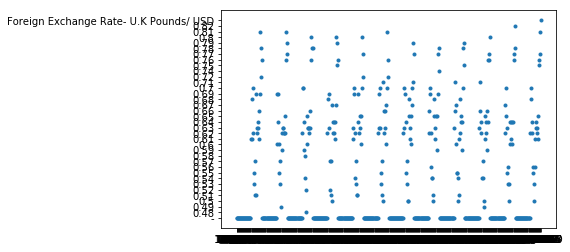

In [ ]:
plt.plot(Exchange.iloc[0],'.')

Okay that's totally cool, but it'd be nice to have dates on it.  Let's boldly try to include the column names as labels (You'll see the problem here in a sec)

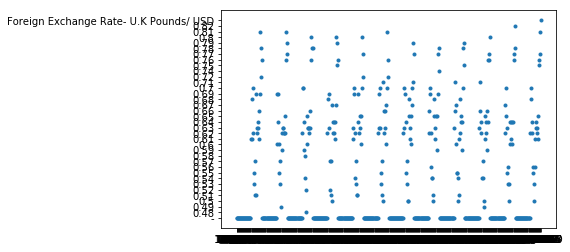

In [ ]:
plt.plot(Exchange.columns, Exchange.iloc[0],'.')

Wow that's terrible.  I think the dates are strings.  Let's check:

In [ ]:
type(Exchange.columns[0])  # returns the type of the 0th
# row of the "date" column

str

Yes they are strings!  Let's see what one looks like.

In [ ]:
Exchange.columns[1]

'1/1/1971'

So I think what we want to do is our original plot, but better labeled. The pyplot module we imported has a function called "xtick" (I'm going to show you how to look things like this up on Friday). The arguments in the function are the tick locations and then the tick labels.

([<matplotlib.axis.XTick at 0x7fb5c6ef8d68>,
 <a list of 6 Text xticklabel objects>)

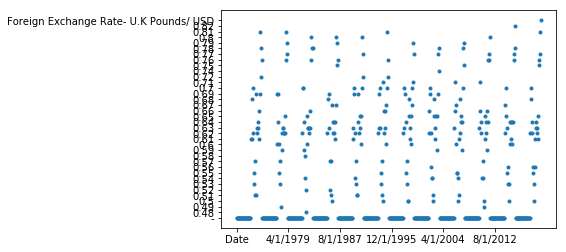

In [ ]:
plt.plot(Exchange.iloc[0],'.')
# Set the tick locations (tkloc for short)
tkloc = np.arange(0, 588, 100)  # I only want a tick at every
# 100th value
# Label each of those ticks with the date from that row
plt.xticks(tkloc, Exchange.columns[tkloc])

## Assignment #2:
(Feel free to skip to this one if the whole csv thing goes to hell in a handbasket)
Do the following two different ways:
* Create a 1000-element array from 0 to 999
* create another 1000-element array that is the sine of the first array (y = sin(x*2*np.pi/period) try several different periods and see which one you like best
* plot the sinewave
* only plot the sinewave where it is larger than .25

First way:
Using x=np.arange(1000) and y = sin(x*2*np.pi/period)

Second way:
Create a loop from 0 to 999, append to x and y each time through the loop

I didn't post the answers to this as you should try this one out for yourself!